# YSC3221 Assignment 1 
### Parag Bhatnagar

### Instructions:

Write a program in Python for image 2D convolution. It should be able to operate using the following kernels:

- Sobel kernel
- Gaussian kernel
- The three types of Haar-like masks

For the Haar-like masks, you're free to decide the size of the masks. Yet, they should be not too small for a relatively large image. For example, for type 1 you can use a 10x20 mask or 20x40 mask (for an image with size of 640x480). Note that, the values in the black mask should be set -1, and the white mask should be set +1.

As for the input image, you can use any image that has size of at least 640x480. The convolution operation is one of the most important operations in computer vision to extract features, please ensure you understand the intuitive idea behind it by analyzing its input and output images.


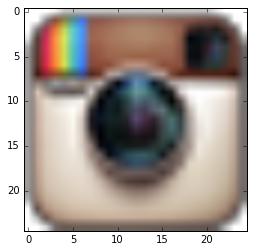

In [361]:
# Loading the image file 
%matplotlib inline

from PIL import Image
import io

import urllib2 as urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# fd = urllib.urlopen("http://www.excelbridge.com/wp-content/uploads/2014/12/image.png")
fd = urllib.urlopen("http://www.ccnorthbay.org/wp-content/uploads/2015/06/instagram.png")

# read the image file in a numpy array
img = plt.imread(fd)
plt.imshow(img)
plt.show()

In [362]:
width = img[0].size/img[0,0].size
height = img.size/img[0].size

print width, height

25 25


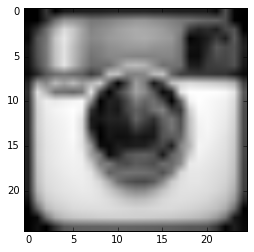

In [363]:
# Creating a grayscale array from image 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = ((0.2989 * r + 0.5870 * g + 0.1140 * b ) * 255)//1

    return gray

gray = rgb2gray(img)
plt.imshow(gray, cmap='Greys_r')
plt.show()

In [381]:
#Defining the filters

sobel_x_3x3 = [[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]]

sobel_y_3x3 = [[-1,-2,-1],
               [ 0, 0, 0],
               [ 1, 2, 1]]

gaussian_3x3 = [[0.0625,  0.125, 0.0625],
                [0.125,    0.25,  0.125],
                [0.0625,  0.125, 0.0625]
               ]

gaussian_5x5 = [[1.0/256.0,  4.0/256.0,  6.0/256.0,  4.0/256.0,  1.0/256.0],
                [4.0/256.0, 16.0/256.0, 24.0/256.0, 16.0/256.0,  4.0/256.0],
                [6.0/256.0, 24.0/256.0, 36.0/256.0, 24.0/256.0,  6.0/256.0],
                [4.0/256.0, 16.0/256.0, 24.0/256.0, 16.0/256.0,  4.0/256.0],
                [1.0/256.0,  4.0/256.0,  6.0/256.0,  4.0/256.0,  1.0/256.0]
               ]

gaussian_7x7 = [[0.0,  0.0,  0.0,  5.0,  0.0,  0.0,  0.0],
                [0.0,  5.0, 18.0, 32.0, 18.0,  5.0,  0.0],
                [0.0, 18.0, 64.0,100.0, 64.0, 18.0,  0.0],
                [5.0, 32.0,100.0,100.0,100.0, 32.0,  5.0],
                [0.0, 18.0, 64.0,100.0, 64.0, 18.0,  0.0],
                [0.0,  5.0, 18.0, 32.0, 18.0,  5.0,  0.0],
                [0.0,  0.0,  0.0,  5.0,  0.0,  0.0,  0.0]
               ]


haarlike_edge_1 = [ [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [-1,-1,-1,-1],
                    [-1,-1,-1,-1],
                    [-1,-1,-1,-1],
                    [-1,-1,-1,-1]]

haarlike_edge_2 = [[ 1, 1, 1, 1,-1,-1,-1,-1],
                   [ 1, 1, 1, 1,-1,-1,-1,-1],
                   [ 1, 1, 1, 1,-1,-1,-1,-1],
                   [ 1, 1, 1, 1,-1,-1,-1,-1],]

haarlike_line_1 = [[ 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1],
                   [ 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1]]


haarlike_line_2 = [ [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [-1,-1,-1,-1],
                    [-1,-1,-1,-1],
                    [-1,-1,-1,-1],
                    [-1,-1,-1,-1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1],
                    [ 1, 1, 1, 1]]

haarlike_rectangle = [[ 1, 1, 1, 1,-1,-1,-1,-1],
                      [ 1, 1, 1, 1,-1,-1,-1,-1],
                      [ 1, 1, 1, 1,-1,-1,-1,-1],
                      [ 1, 1, 1, 1,-1,-1,-1,-1],
                      [-1,-1,-1,-1, 1, 1, 1, 1],
                      [-1,-1,-1,-1, 1, 1, 1, 1],
                      [-1,-1,-1,-1, 1, 1, 1, 1],
                      [-1,-1,-1,-1, 1, 1, 1, 1]]
# sobel_x_3x3[0][0]

In [376]:
gray.shape

(25L, 25L)

In [377]:
def run_filter(filterx):
    filter_height = len(filterx)
    filter_width = len(filterx[0])
    print "height of filter:", filter_height , "\n width of filter:", filter_width
    
    border_x = filter_width//2
    border_y= filter_height//2
    filter_output = np.zeros((height,width))
    
    print "border_x: ", border_x
    print "border_y: ", border_y
    
    min_val = 1000000
    max_val = -1000000
    
    for y in range(height):
        for x in range(width):
#             print "Calculating filter at position: ", x,y
            if (x - border_x < 0) or (x + border_x >= width):
                filter_output[y,x] = 0
            elif (y - border_y < 0) or (y + border_y >= height):
                filter_output[y,x] = 0
            else:
                value = 0
                for fy in range(filter_height):
                    for fx in range(filter_width):
#                         print "filter position: x=", fx,"y=", fy
#                         print "picture position x=", (x-border_x + fx),"y=", (y-border_y + fy)
#                         print "value at position = ", gray[(x - border_x + fx),(y - border_y + fy)]
#                         print "=", filter_output[fx][fy]*gray[(x-border_x + fx),(y-border_y + fy)]
#                         print (x-border_x + fx),",",(y-border_y + fy)
#                         print gray[(x - border_x + fx),(y - border_y + fy)]
                        value += filterx[fy][fx]*gray[(y-border_y + fy),(x-border_x + fx)]
                        
                filter_output[y,x] = value;
#                 print "value:", value
                if ( value > max_val ): 
                    max_val = value
                if ( value < min_val ): 
                    min_val = value
    print min_val, max_val
    filter_output = (filter_output/max_val)*255
    return filter_output


height of filter: 3 
 width of filter: 3
border_x:  1
border_y:  1
-883.0 802.0


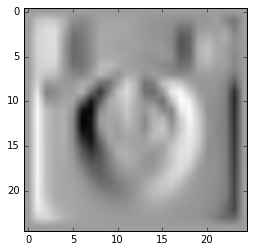

In [367]:
sobel_output = run_filter(sobel_x_3x3)
plt.imshow(sobel_output, cmap='Greys_r')
plt.show()

height of filter: 3 
 width of filter: 3
border_x:  1
border_y:  1
-533.0 834.0


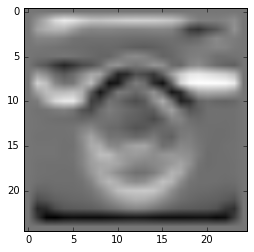

In [368]:
sobel_output = run_filter(sobel_y_3x3)
plt.imshow(sobel_output, cmap='Greys_r')
plt.show()

height of filter: 3 
 width of filter: 3
border_x:  1
border_y:  1
14.5625 245.5


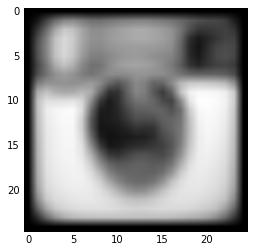

In [369]:
gaussian_output = run_filter(gaussian_3x3)
plt.imshow(gaussian_output, cmap='Greys_r')
plt.show()

height of filter: 5 
 width of filter: 5
border_x:  2
border_y:  2
20.84765625 238.1484375


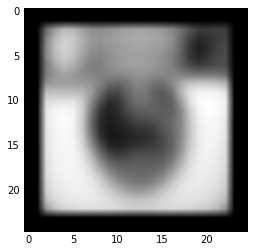

In [370]:
gaussian_output = run_filter(gaussian_5x5)
plt.imshow(gaussian_output, cmap='Greys_r')
plt.show()

height of filter: 7 
 width of filter: 7
border_x:  3
border_y:  3
23471.0 250978.0


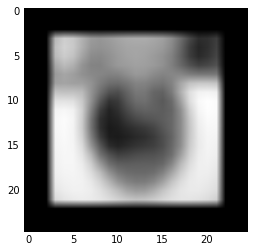

In [371]:
gaussian_output = run_filter(gaussian_7x7)
plt.imshow(gaussian_output, cmap='Greys_r')
plt.show()

height of filter: 8 
 width of filter: 4
border_x:  2
border_y:  4
-3010.0 1179.0


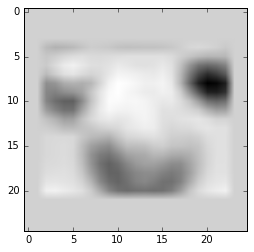

In [378]:
haar_output = run_filter(haarlike_edge_1)
plt.imshow(haar_output, cmap='Greys_r')
plt.show()

height of filter: 4 
 width of filter: 8
border_x:  4
border_y:  2
-2600.0 3261.0


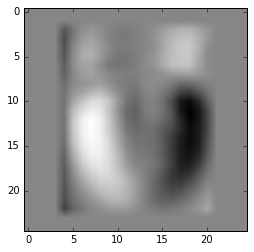

In [382]:
haar_output = run_filter(haarlike_edge_2)
plt.imshow(haar_output, cmap='Greys_r')
plt.show()

height of filter: 4 
 width of filter: 12
border_x:  6
border_y:  2
-142.0 4200.0


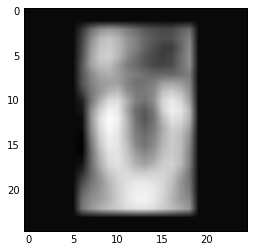

In [383]:
haar_output = run_filter(haarlike_line_1)
plt.imshow(haar_output, cmap='Greys_r')
plt.show()

height of filter: 12 
 width of filter: 4
border_x:  2
border_y:  6
271.0 4367.0


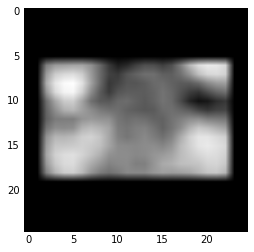

In [384]:
haar_output = run_filter(haarlike_line_2)
plt.imshow(haar_output, cmap='Greys_r')
plt.show()

height of filter: 8 
 width of filter: 8
border_x:  4
border_y:  4
-2816.0 3491.0


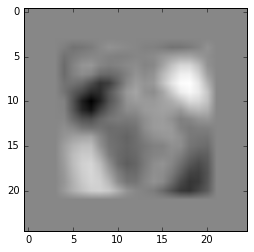

In [385]:
haar_output = run_filter(haarlike_rectangle)
plt.imshow(haar_output, cmap='Greys_r')
plt.show()

In [379]:
# Saving the final image
final_img = Image.fromarray(gray.astype(int))

final_img.save('final_img.png')
final_img.show()